<a href="https://colab.research.google.com/github/anveshkumar0206/waste_classification/blob/main/Wastage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
file_path = 'Waste_Collection___Diversion_Report__daily_.csv'
df_waste_collection = pd.read_csv(file_path)
df_waste_collection.head()
df_waste_collection.shape

(740873, 8)

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df_waste_collection.isnull().sum())


Missing values in the dataset:
Report Date         0
Load Type           0
Load Time           0
Load Weight     72335
Dropoff Site        0
Route Type          0
Route Number        0
Load ID             0
dtype: int64


In [ ]:
# Handling missing values
df_waste_collection.dropna(inplace=True)  # Drop rows with missing values
df_waste_collection['Report Date'] = pd.to_datetime(df_waste_collection['Report Date'])

In [ ]:
df_waste_collection.shape

(668538, 8)

In [ ]:
# Feature Engineering
# Extract day of week and month from 'Report Date'
df_waste_collection['Day of Week'] = df_waste_collection['Report Date'].dt.dayofweek
df_waste_collection['Month'] = df_waste_collection['Report Date'].dt.month
df_waste_collection['Year'] = df_waste_collection['Report Date'].dt.year

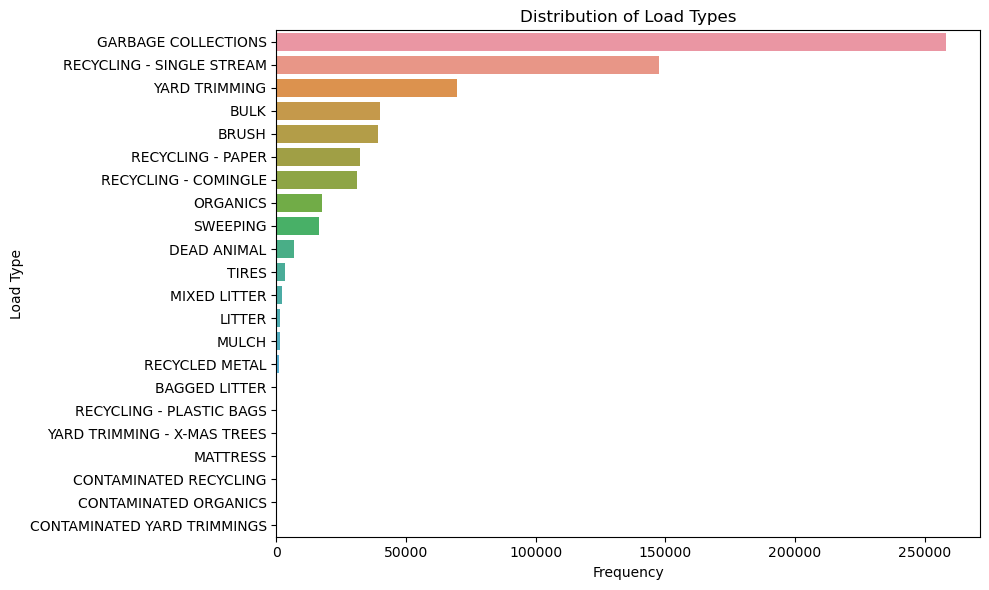

In [ ]:
# Visualizations
# Distribution of Load Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_waste_collection, y='Load Type', order=df_waste_collection['Load Type'].value_counts().index)
plt.title('Distribution of Load Types')
plt.xlabel('Frequency')
plt.ylabel('Load Type')
plt.tight_layout()
plt.show()

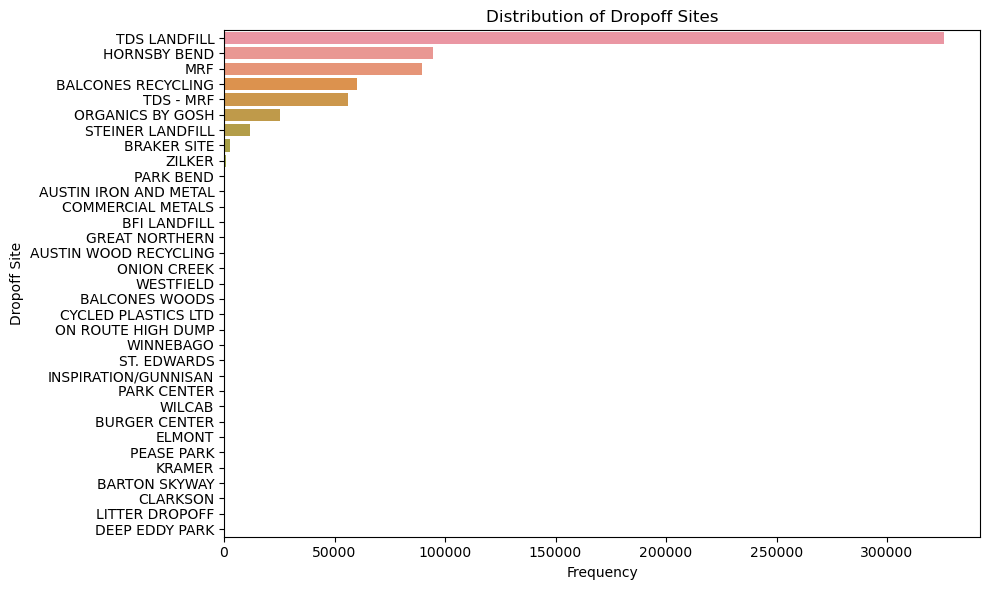

In [ ]:
# Distribution of Dropoff Sites
plt.figure(figsize=(10, 6))
sns.countplot(data=df_waste_collection, y='Dropoff Site', order=df_waste_collection['Dropoff Site'].value_counts().index)
plt.title('Distribution of Dropoff Sites')
plt.xlabel('Frequency')
plt.ylabel('Dropoff Site')
plt.tight_layout()
plt.show()

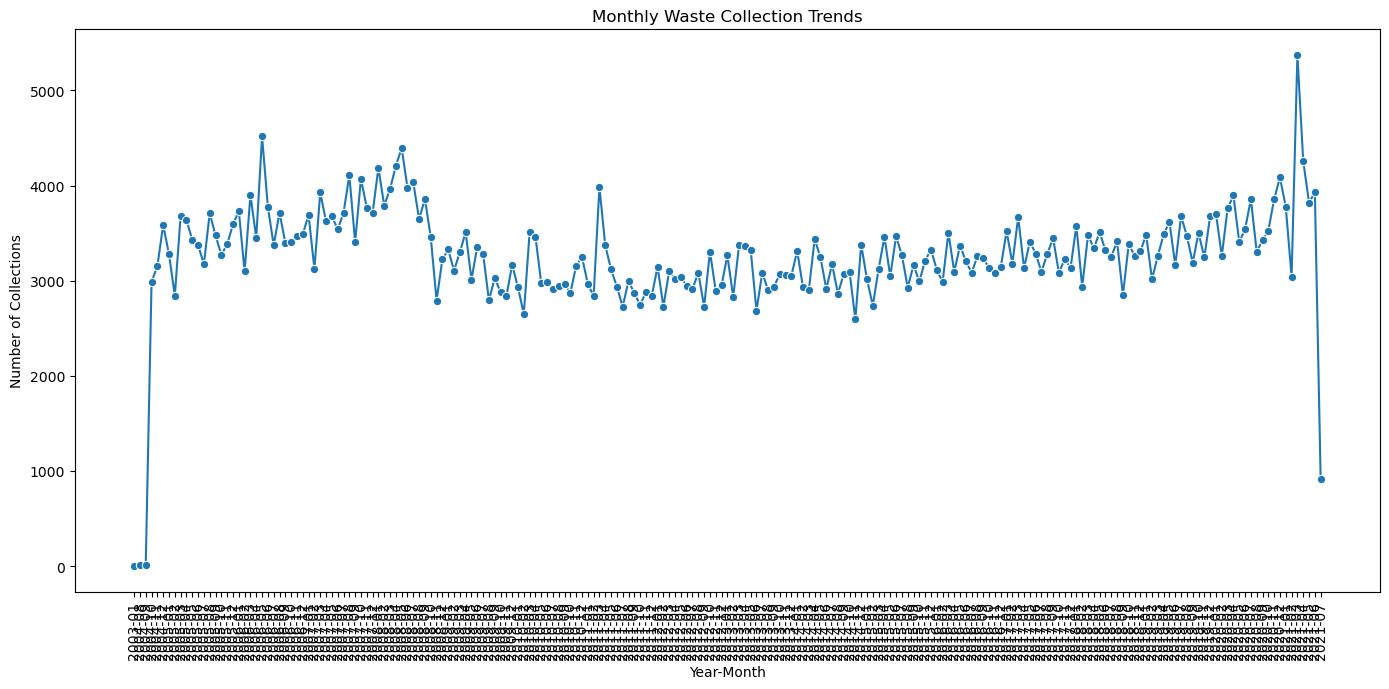

In [ ]:
# Monthly Waste Collection Trends
df_waste_collection['Year-Month'] = df_waste_collection['Report Date'].dt.to_period('M')
monthly_trends = df_waste_collection.groupby('Year-Month').size().reset_index(name='Counts')
monthly_trends['Year-Month'] = monthly_trends['Year-Month'].astype(str)  # Convert to String for plotting

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='Year-Month', y='Counts', marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Waste Collection Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Collections')
plt.tight_layout()
plt.show()

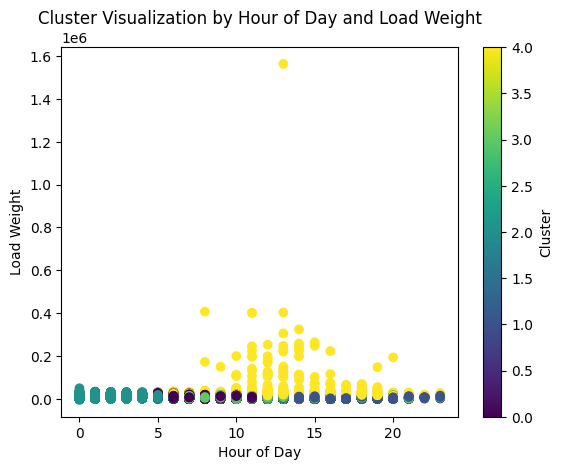

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert 'Report Date' and 'Load Time' to datetime
df_waste_collection['Report Date'] = pd.to_datetime(df_waste_collection['Report Date'])
df_waste_collection['Load Time'] = pd.to_datetime(df_waste_collection['Load Time'], format='%m/%d/%Y %I:%M:%S %p').dt.time

# Basic Feature Engineering
df_waste_collection['Day of Week'] = df_waste_collection['Report Date'].dt.dayofweek
df_waste_collection['Hour of Day'] = pd.to_datetime(df_waste_collection['Load Time'], format='%H:%M:%S').dt.hour

# Assume we want to cluster based on 'Day of Week', 'Hour of Day', and 'Load Weight'
# We need to handle missing values first
df_waste_collection['Load Weight'] = df_waste_collection['Load Weight'].fillna(df_waste_collection['Load Weight'].median())

# Standardize features
features = df_waste_collection[['Day of Week', 'Hour of Day', 'Load Weight']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Clustering (example using KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)
df_waste_collection['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters (simplified example)
plt.scatter(df_waste_collection['Hour of Day'], df_waste_collection['Load Weight'], c=df_waste_collection['Cluster'], cmap='viridis')
plt.title('Cluster Visualization by Hour of Day and Load Weight')
plt.xlabel('Hour of Day')
plt.ylabel('Load Weight')
plt.colorbar(label='Cluster')
plt.show()
